<a href="https://colab.research.google.com/github/SJayGanesh/Image-Processing/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import cv2
from google.colab.patches import cv2_imshow
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.image as mimg

In [19]:
c0=os.listdir("/content/drive/MyDrive/GOJO")
c1=os.listdir("/content/drive/MyDrive/NAGI SEISHIRO")

In [20]:
limit=10
c0_images=[None]*limit
j=0
for i in c0:
 if(j<limit):
  c0_images[j]=imread("/content/drive/MyDrive/GOJO/"+i)
  j+=1
 else:
  break

In [21]:
c1_images=[None]*limit
j=0
for i in c1:
 if(j<limit):
  c1_images[j]=imread("/content/drive/MyDrive/NAGI SEISHIRO/"+i)
  j+=1
 else:
  break

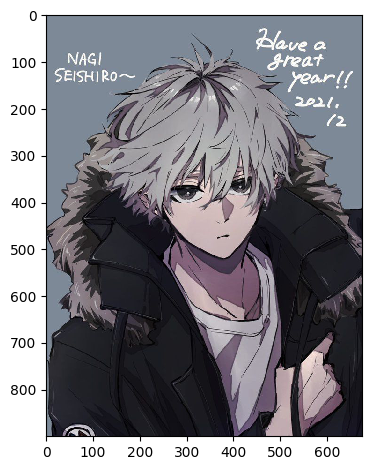

In [22]:
imshow(c0_images[1])
imshow(c1_images[1])

In [23]:
c0_gray=[None]*limit
j=0
for i in c0:
 if(j<limit):
  c0_gray[j]=rgb2gray(c0_images[j])
  j+=1
 else:
  break

In [24]:
c1_gray=[None]*limit
j=0
for i in c1:
 if(j<limit):
  c1_gray[j]=rgb2gray(c1_images[j])
  j+=1
 else:
  break

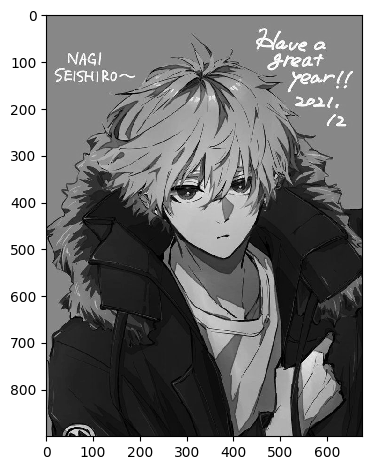

In [25]:
imshow(c0_gray[1])
imshow(c1_gray[1])

In [26]:
for j in range (10):
 _c0 = c0_gray[j]
 c0_gray[j]=resize(_c0,(240,240))

for j in range (10):
 _c1=c1_gray[j]
 c1_gray[j]=resize(_c1,(240,240))

In [27]:
len_of_images_c0=len(c0_gray)
len_of_images_c1=len(c1_gray)

In [28]:
image_size_c0=c0_gray[1].shape
image_size_c1=c1_gray[1].shape

In [29]:
flatten_size_c0=image_size_c0[0]*image_size_c0[1]
flatten_size_c1=image_size_c1[0]*image_size_c1[1]

In [30]:
for i in range(10):
 c0_gray[i]=np.ndarray.flatten(c0_gray[i]).reshape(flatten_size_c0,1)
for i in range(10):
 c1_gray[i]=np.ndarray.flatten(c1_gray[i]).reshape(flatten_size_c1,1)

In [31]:
c0_gray=np.dstack(c0_gray)
c1_gray=np.dstack(c1_gray)

In [32]:
c0_gray=np.rollaxis(c0_gray,axis=2,start=0)
c1_gray=np.rollaxis(c1_gray,axis=2,start=0)

In [33]:
c0_gray=c0_gray.reshape(len_of_images_c0,flatten_size_c0)
c1_gray=c1_gray.reshape(len_of_images_c1,flatten_size_c1)

In [34]:
c0_data=pd.DataFrame(c0_gray)
c1_data=pd.DataFrame(c1_gray)

In [47]:
c0_data["label"]="Gojo Satoru"
c1_data["label"]="Nagi Seishiro"

In [48]:
df=pd.concat([c0_data,c1_data])

In [49]:
from sklearn.utils import shuffle
tvd_indexed=shuffle(df).reset_index()
tvd_indexed

,index,0,1,2,3,4,5,6,7,8,...,57591,57592,57593,57594,57595,57596,57597,57598,57599,label
0,4,0.468490,0.977398,0.997148,0.999994,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.995900,0.948676,0.989769,0.991396,0.999931,1.000000,1.000000,1.000000,1.000000,Nagi Seishiro
1,4,0.570084,0.527323,0.491452,0.499714,0.566867,0.643995,0.677558,0.684767,0.693706,...,0.310081,0.308585,0.303684,0.299149,0.294468,0.295448,0.301331,0.283806,0.261061,Gojo Satoru
2,2,0.037405,0.038800,0.039192,0.041471,0.048528,0.051353,0.067976,0.071020,0.071448,...,0.056131,0.059640,0.068789,0.075732,0.085533,0.078345,0.074207,0.072313,0.063169,Gojo Satoru
3,8,0.917915,0.917915,0.917915,0.917915,0.917915,0.917915,0.917915,0.917915,0.917915,...,0.460612,0.460612,0.460612,0.460612,0.460612,0.460612,0.460612,0.460612,0.460612,Gojo Satoru
4,7,0.531213,0.531213,0.531213,0.531213,0.531213,0.531213,0.531213,0.531213,0.531213,...,0.091705,0.091697,0.089168,0.093498,0.066612,0.061308,0.093827,0.099807,0.097380,Nagi Seishiro
5,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gojo Satoru
6,1,0.531213,0.531213,0.531213,0.531213,0.531213,0.531213,0.531213,0.531213,0.531213,...,0.091705,0.091697,0.089168,0.093498,0.066612,0.061308,0.093827,0.099807,0.097380,Nagi Seishiro
7,1,0.917915,0.917915,0.917915,0.917915,0.917915,0.917915,0.917915,0.917915,0.917915,...,0.460612,0.460612,0.460612,0.460612,0.460612,0.460612,0.460612,0.460612,0.460612,Gojo Satoru
8,9,0.915962,0.913687,0.905417,0.906753,0.889315,0.654035,0.717128,0.833212,0.783905,...,0.140410,0.180136,0.190870,0.191516,0.218338,0.219657,0.222544,0.230118,0.207452,Nagi Seishiro
9,5,0.924919,0.924927,0.924925,0.924930,0.924922,0.924925,0.924925,0.924925,0.924925,...,0.266143,0.273562,0.279037,0.282672,0.283098,0.284587,0.286555,0.288217,0.285262,Nagi Seishiro


In [50]:
vam=tvd_indexed.drop(['index'],axis=1)

In [51]:
vam.to_csv("/content/drive/MyDrive/vehicles.csv")

In [52]:
x=vam.values[:,:-1]
y=vam.values[:,-1]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
from sklearn import svm

In [56]:
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [57]:
y_pred

array(['Nagi Seishiro', 'Gojo Satoru', 'Gojo Satoru', 'Nagi Seishiro'],
      dtype=object)

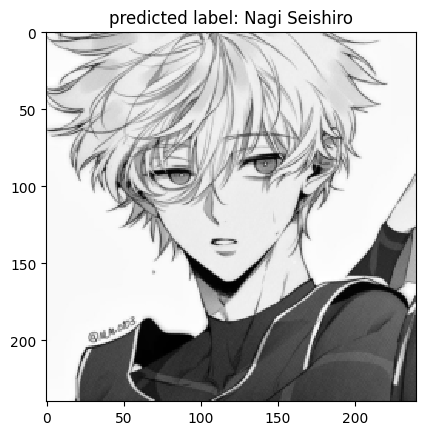

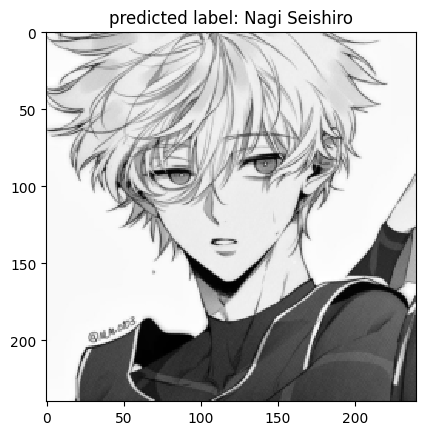

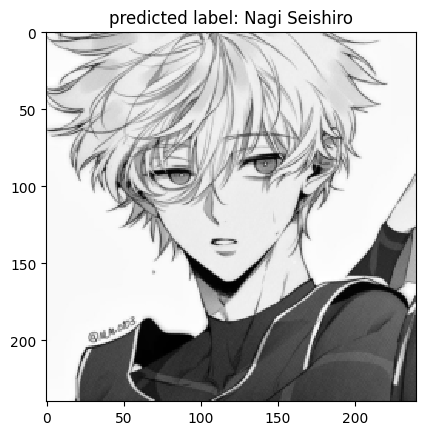

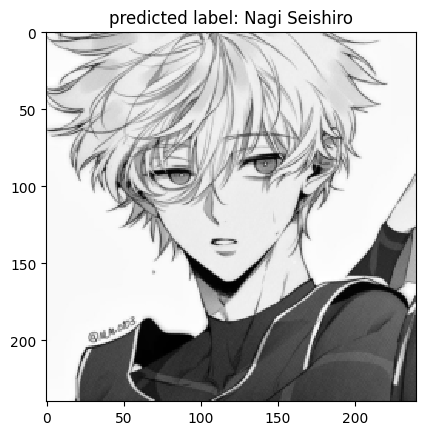

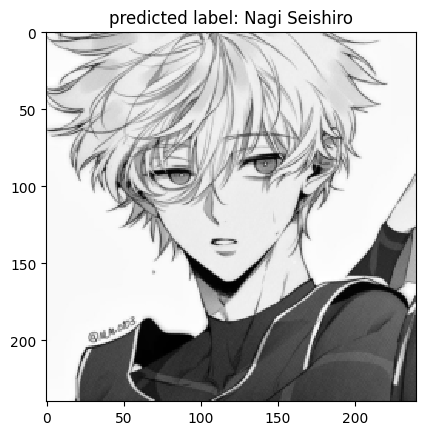

In [61]:
for i in (np.random.randint(3,4,5)):
  predicted_images = (np.reshape(x_test[i], (240,240)).astype(np.float64))
  plt.title('predicted label: {0}'. format(y_pred[i]))
  plt.imshow(predicted_images, interpolation='nearest', cmap='gray')
  plt.show()